<a href="https://colab.research.google.com/github/MITESH1762/frauddetection/blob/main/frauddection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pratice.csv to pratice (3).csv
Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


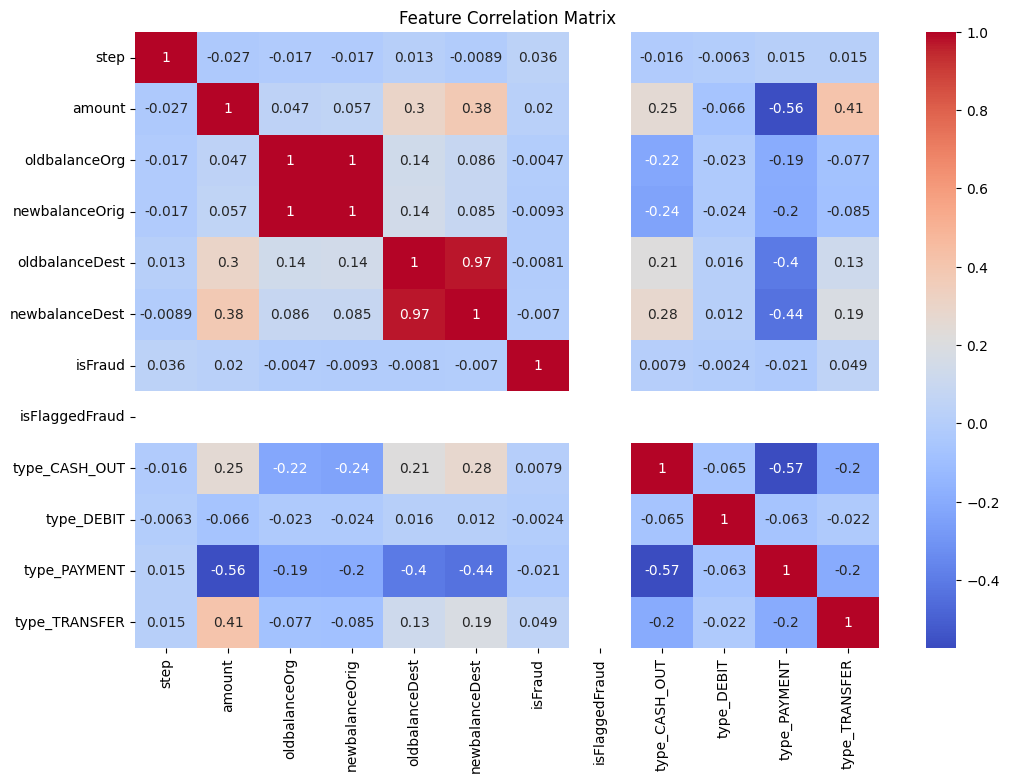

Model Accuracy: 0.9997555128457626
Confusion Matrix:
 [[294262      1]
 [    71    160]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    294263
           1       0.99      0.69      0.82       231

    accuracy                           1.00    294494
   macro avg       1.00      0.85      0.91    294494
weighted avg       1.00      1.00      1.00    294494



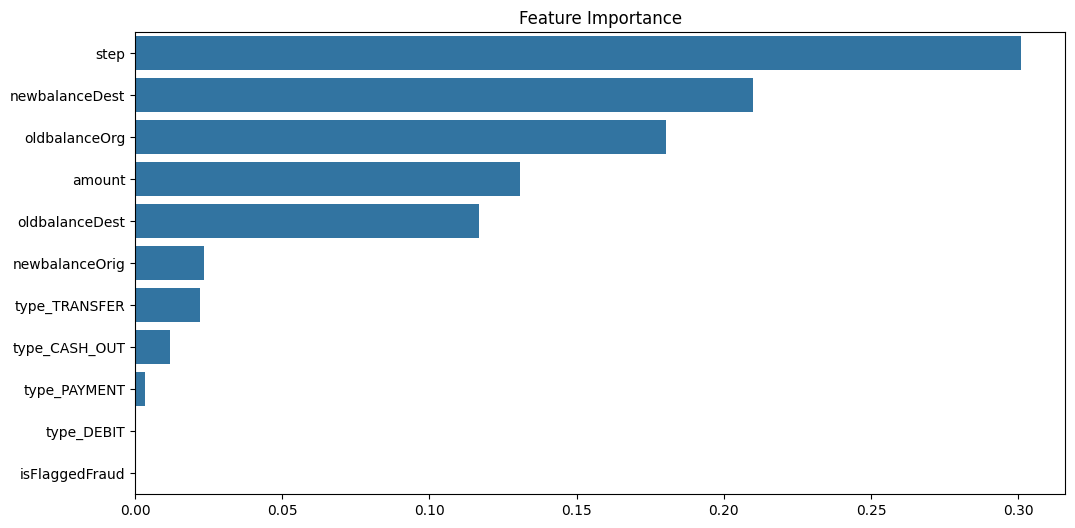

['fraud_detection_model.pkl']

In [ ]:
# Step 1: Install required libraries (Google Colab already has most of them)
# Uncomment if you need to install any of these packages
# !pip install seaborn scikit-learn pandas matplotlib

# Step 2: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy import stats
import joblib

# Step 3: Load dataset in Colab (Uncomment if uploading from local machine)
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(file_path)



# Step 4: Data Cleaning and Preprocessing
# Check for missing values and fill them (or remove rows with missing values)
print("Missing Values:\n", df.isnull().sum())
df.fillna(0, inplace=True)  # Fill missing values with 0 (you can choose a different strategy)

# Remove non-essential columns like 'nameOrig' and 'nameDest'
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Remove outliers (Z-Score method)
z = np.abs(stats.zscore(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]))
df = df[(z < 3).all(axis=1)]  # Remove rows with outliers

# Step 4.1: One-hot encode the 'type' column to handle categorical data
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Step 5: Visualize correlation to check for multi-collinearity
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Step 6: Define features and target variable
X = df.drop(['isFraud'], axis=1)  # Features
y = df['isFraud']  # Target variable

# Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Scale features (optional for tree-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 10: Evaluate the model
y_pred = rf_model.predict(X_test_scaled)

# Print Model Accuracy and Performance Metrics
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 11: Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Feature Importance')
plt.show()

# Optional: Save the trained model (so you don't have to retrain it in future)
joblib.dump(rf_model, 'fraud_detection_model.pkl')

# Step 12: Load and use the saved model later
# loaded_model = joblib.load('fraud_detection_model.pkl')
# y_loaded_pred = loaded_model.predict(X_test_scaled)
